In [1]:
# to access functions from root directory
import sys
sys.path.append('/data/ad181/RemoteDir/ada_multigrid_ppo')

In [2]:
%matplotlib notebook
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.multigrid_framework_functions import is_converged

import matplotlib
matplotlib.rcParams['text.usetex'] = True

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
case_label='case_2'
data_dir = './'+case_label
os.makedirs(data_dir, exist_ok=True)

In [4]:
def get_converge_index(r_array,
                       convergence_routine,
                       n = 5,
                       delta = 2):
    for i,_ in enumerate(r_array):
        r = r_array[:i+1]
        converge_flag = convergence_routine(r, n, delta)
        if converge_flag:
            return i-1

# convergence criteria: effect of n

<IPython.core.display.Javascript object>


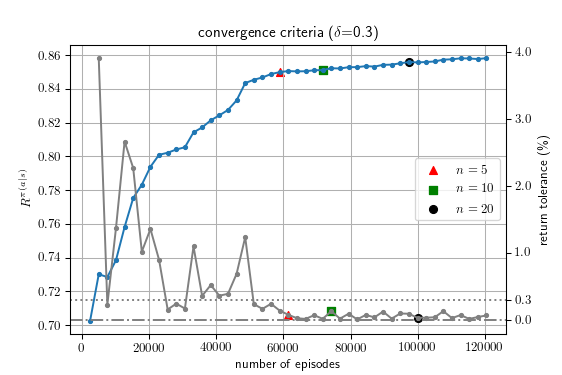

In [5]:
data = np.load('r_array_example.npy')
t_array, r_array = data[0], data[1]
delta=0.3
ns = [5,10,20]
colors = ['r', 'g', 'k']
markers = ['^', 's', 'o']

conv_indices = []
for n in ns:
    conv_index = get_converge_index(r_array, 
                                    convergence_routine = is_converged,
                                    n = n,              
                                    delta = delta)    
    conv_indices.append(conv_index)

fig,axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(t_array,r_array, '.-')
for ind,color, marker in zip(conv_indices, colors, markers):
    axs.scatter(t_array[ind], r_array[ind], c=color, marker=marker)
axs.grid('on')
axs.set_xlabel('number of episodes')
axs.set_ylabel(r'$R^{\pi(a|s)}$')
axs.set_title(r'convergence criteria ($\delta$='+str(delta)+')')

ax = axs.twinx()
gradient = r_array[1:] - r_array[:-1] 
per_gradient = 100 * np.abs(gradient / r_array[:-1])
ax.plot(t_array[1:], per_gradient, '.-', color='grey', label=None)
for ind,color,marker,n in zip(conv_indices, colors, markers, ns):
    ax.scatter(t_array[1:][ind], per_gradient[ind], c=color, marker=marker, label=r'$n='+str(n)+'$')
ax.legend(loc='right')
ax.set_ylabel('return tolerance (\%)')

ax.axhline(delta, linestyle=':', color='grey')
ax.axhline(0, linestyle='dashdot', color='grey')
ax.set_yticks([0,delta,1,2,3,4])

fig.savefig(data_dir+'/'+case_label+'_conv_criteria_n_effect.pdf')

# convergence criteria: effect of delta

[26, 22, 16]


<IPython.core.display.Javascript object>


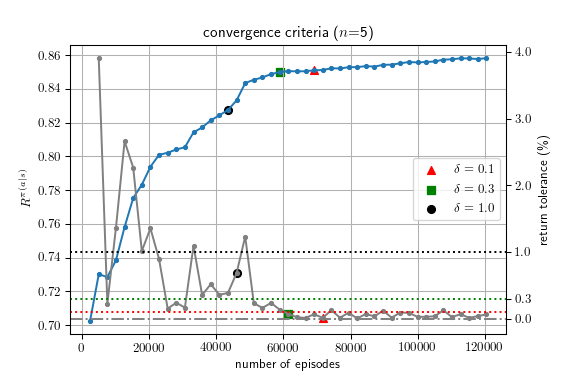

In [6]:
data = np.load('r_array_example.npy')
t_array, r_array = data[0], data[1]
deltas=[0.1, 0.3, 1.0]
n = 5
colors = ['r', 'g', 'k']
markers = ['^', 's', 'o']

conv_indices = []
for delta in deltas:
    conv_index = get_converge_index(r_array, 
                                    convergence_routine = is_converged,
                                    n = n,              
                                    delta = delta)    
    conv_indices.append(conv_index)
    
print(conv_indices)

fig,axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(t_array,r_array, '.-')
for ind,color, marker in zip(conv_indices, colors, markers):
    axs.scatter(t_array[ind], r_array[ind], c=color, marker=marker)
axs.grid('on')
axs.set_xlabel('number of episodes')
axs.set_ylabel(r'$R^{\pi(a|s)}$')
axs.set_title(r'convergence criteria ($n$='+str(n)+')')

ax = axs.twinx()
gradient = r_array[1:] - r_array[:-1] 
per_gradient = 100 * np.abs(gradient / r_array[:-1])
ax.plot(t_array[1:], per_gradient, '.-', color='grey', label=None)
for ind,color,marker,delta in zip(conv_indices, colors, markers, deltas):
    ax.scatter(t_array[1:][ind], per_gradient[ind], c=color, marker=marker, label=r'$\delta='+str(delta)+'$')
    ax.axhline(delta, linestyle=':', color=color)
ax.legend(loc='right')
ax.set_ylabel('return tolerance (\%)')

ax.axhline(0, linestyle='dashdot', color='grey')
ax.set_yticks([0,deltas[1],1,2,3,4])

fig.savefig(data_dir+'/'+case_label+'_conv_criteria_delta_effect.pdf')